## Grover's algorithm dependence on an error rotation angle

Implementation of an error in Grover's algorithm to observe the impact on the probability to measure the solution state as function of the angle of rotation

Import the required packages

In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import Aer, assemble, transpile
from qiskit.visualization import plot_histogram

Definition of the registers

In [16]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
creg_meas = ClassicalRegister(3, 'meas')
circuit = QuantumCircuit(qreg_q, creg_c, creg_meas)

Initialisation

In [17]:
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

Oracle

In [18]:
circuit.cz(qreg_q[2], qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

Introducing the error

In [19]:
circuit.rx(pi/8, qreg_q[0])

Diffuser

In [20]:
circuit.h(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.x(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

Measurement

In [21]:
circuit.measure(qreg_q[0], creg_meas[0])
circuit.measure(qreg_q[1], creg_meas[1])
circuit.measure(qreg_q[2], creg_meas[2])

Simulation of the circuit

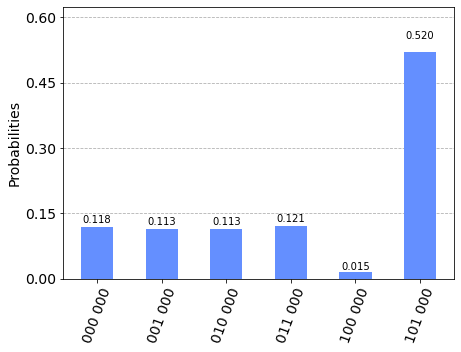

In [22]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Drawing the circuit

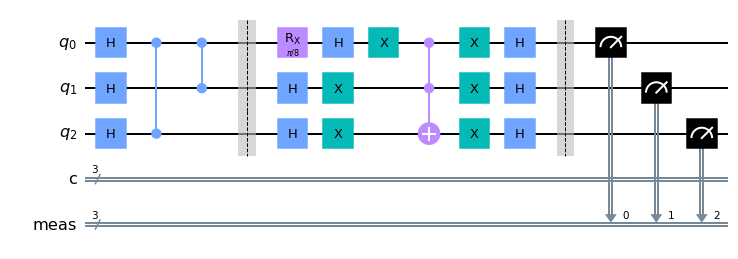

In [23]:
circuit.draw(output="mpl")
